<a href="https://colab.research.google.com/github/AsankaASMAH/MassCoG/blob/main/MassCoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

                        0                                               1   \
0                                                                            
1                                                                            
2    CM190_40X127_EV_ISKEL     w.r.t. "CM190_40X127_EV_ISKEL" DEFAULT CSYS   
3                             w.r.t. "CENTERSHIP_EV1_INHSKEL" DEFAULT CSYS   
4        CM100_34_EV_ISKEL         w.r.t. "CM100_34_EV_ISKEL" DEFAULT CSYS   
..                     ...                                             ...   
123                         w.r.t. "POWERTRAIN_F_EV1_INHSKEL" DEFAULT CSYS   
124          CM067_1_ISKEL             w.r.t. "CM067_1_ISKEL" DEFAULT CSYS   
125                         w.r.t. "POWERTRAIN_F_EV1_INHSKEL" DEFAULT CSYS   
126    TAILWT_PTR_EV_ISKEL       w.r.t. "TAILWT_PTR_EV_ISKEL" DEFAULT CSYS   
127                         w.r.t. "POWERTRAIN_F_EV1_INHSKEL" DEFAULT CSYS   

           2            3         4         5            6     

# New Section

Monte Carlo results for mass, CoG and comparison plots...
{'CM060-063MBAMass': [35130, 36820, 38500], 'CM060-063MBACogX': [-10, 0, 10], 'CM060-063MBACogY': [-775, -764, -753], 'CM060-063MBACogZ': [2191, 2200, 2209], 'CM080_22X24Mass': [45500, 46000, 46900], 'CM080_22X24CogX': [-10, 0, 10], 'CM080_22X24CogY': [2211, 2222, 2233], 'CM080_22X24CogZ': [1958, 1966, 1975], 'CM090_24X14Mass': [14000, 14750, 15500], 'CM090_24X14CogX': [-10, 0, 10], 'CM090_24X14CogY': [3911, 3922, 3933], 'CM090_24X14CogZ': [1779, 1788, 1797], 'CM052-054_345Mass': [315, 340, 365], 'CM052-054_345CogX': [-5, 0, 5], 'CM052-054_345CogY': [4683, 4688, 4694], 'CM052-054_345CogZ': [1703, 1707, 1712], 'CM067_1Mass': [10, 20, 100], 'CM067_1CogX': [899, 901, 902], 'CM067_1CogY': [439, 445, 451], 'CM067_1CogZ': [2820, 2826, 2833], 'TAILWT_PTR_EVMass': [100, 400, 700], 'TAILWT_PTR_EVCogX': [-10, 0, 10], 'TAILWT_PTR_EVCogY': [1350, 1360, 1450], 'TAILWT_PTR_EVCogZ': [2000, 2025, 2050]}


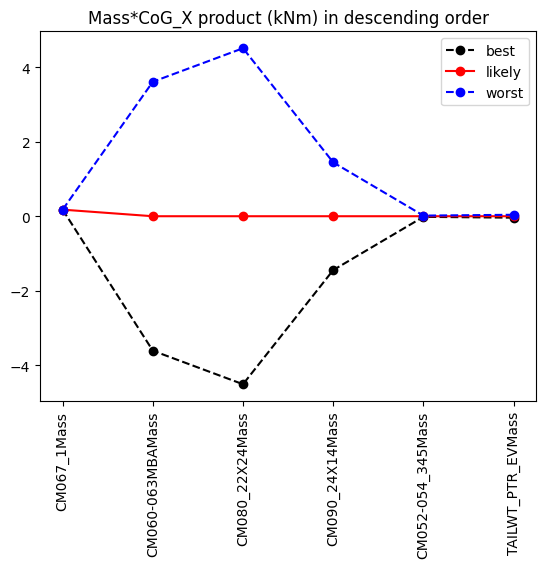

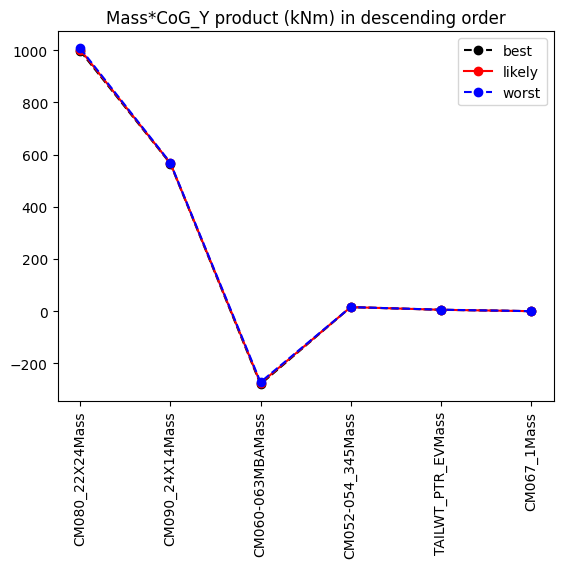

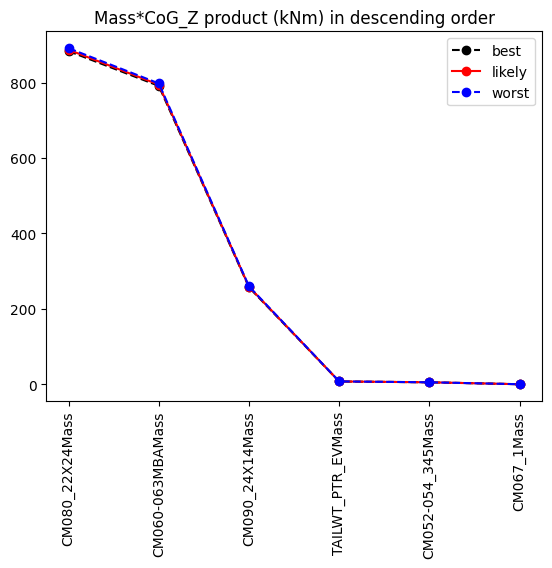

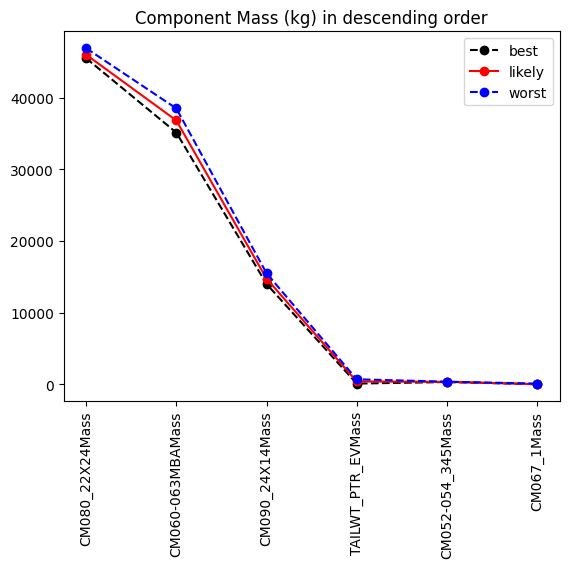

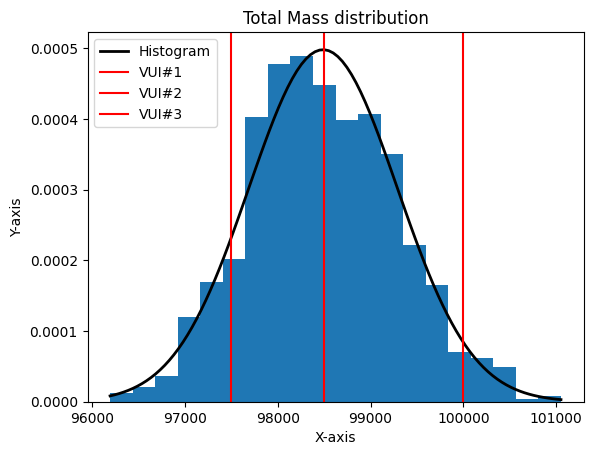

Mean is  98489 , Std Deviation is  801
95% CI is  96919 to  100058 , 99% CI is  96426 to  100551


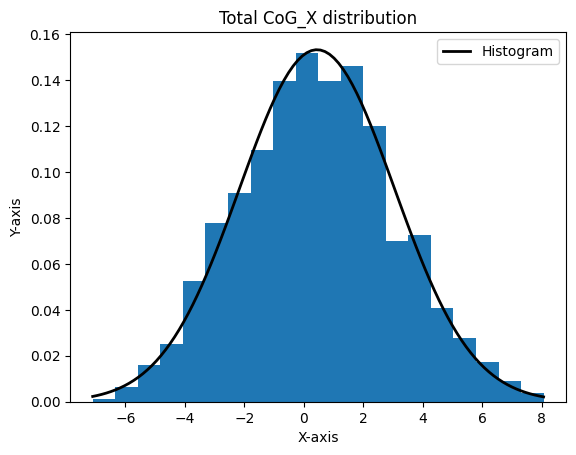

Mean is  0 , Std Deviation is  3
95% CI is  -5 to  6 , 99% CI is  -6 to  7


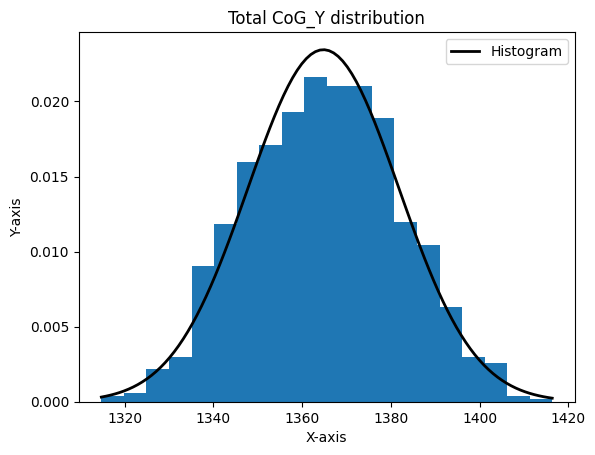

Mean is  1365 , Std Deviation is  17
95% CI is  1331 to  1398 , 99% CI is  1321 to  1409


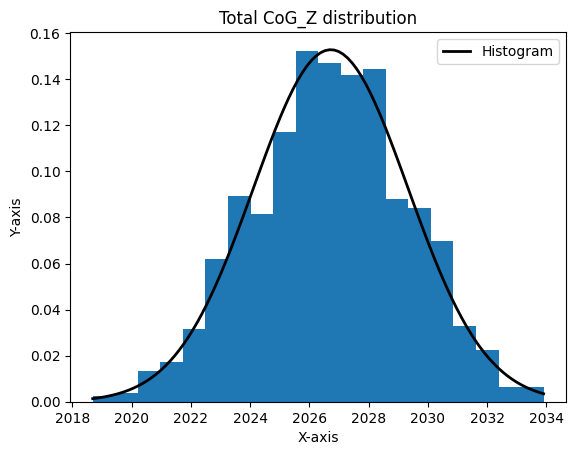

Mean is  2027 , Std Deviation is  3
95% CI is  2022 to  2032 , 99% CI is  2020 to  2033


"\nF1=[] #lifting force at front corner casting\nF2=[] #lifting force at rear corner casting\n#Initializing\ni=0\nn=len(SM)-1 #this can be eliminated?\nwhile i<1000:\n  f1=SM[randint(0,n)]*(10231-CoGy[randint(0,n)])/11989\n  f2=SM[randint(0,n)]*(CoGy[randint(0,n)]+1758)/11989\n  F1.insert(i,f1)\n  F2.insert(i,f2)\n  i+=1\n\nplt.title('Front lifting force distribution')\nHist=Histograms(F1,0,0,32550)\nHist.print_hist()\n\nplt.title('Rear lifting force distribution')\nHist=Histograms(F2,0,0,32550)\nHist.print_hist()\n"

In [ ]:
print("Monte Carlo results for mass, CoG and comparison plots...")

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
from random import randint

#weight data collection


from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from google.colab import sheets
worksheet = gc.open('WeightDataSC').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
PD=pd.DataFrame.from_records(rows)

A={}
x=2
while x < len(PD):
  A[PD.iloc[x,0]+'Mass']=[int(i.replace(',','')) for i in PD.iloc[x,11:14].tolist()]
  A[PD.iloc[x,0]+'CogX']=[int(i.replace(',','')) for i in PD.iloc[x+1,2:5].tolist()]
  A[PD.iloc[x,0]+'CogY']=[int(i.replace(',','')) for i in PD.iloc[x+1,5:8].tolist()]
  A[PD.iloc[x,0]+'CogZ']=[int(i.replace(',','')) for i in PD.iloc[x+1,8:11].tolist()]
  x+=2

print(A)
"""

#if data is in the dictionary format already...
A= {
       'CM190' : [21700,22450,23400],
     'CM190_X' : [-125,-25,75],
     'CM190_Y' : [4050,4200,4350],
     'CM190_Z' : [1141,1421,1701],
     'CM100' : [11750,11950,12150],
     'CM100_X' : [-20,-15,-10],
     'CM100_Y' : [-70,-80,-90],
     'CM100_Z' : [570,580,590],
     'CM101' : [3450,3850,4250],
     'CM101_X' : [-10,0,10],
     'CM101_Y' : [-10,0,10],
     'CM101_Z' : [30,50,70],
     'CM131' : [2100,2175,2250],
     'CM131_X' : [-70,-60,-50],
     'CM131_Y' : [8230,8240,8250],
     'CM131_Z' : [1172.5,1182.5,1192.5],
     'CM133' : [50,70,90],
     'CM133_X' : [46.5,51.5,56.5],
     'CM133_Y' : [9099,9104,9109],
     'CM133_Z' : [1971.7,1976.7,1981.7],
     'CM132' : [630,650,670],
     'CM132_X' : [-1635,-1630,-1625],
     'CM132_Y' : [8598.5,8593.5,8588.5],
     'CM132_Z' : [1281,1286,1291],
     'CM105' : [170,190,220],
     'CM105_X' : [-1837,-1832,-1827],
     'CM105_Y' : [6773,6768,6763],
     'CM105_Z' : [2353,2358,2363],
     'CM126' : [70,85,100],
     'CM126_X' : [527,517,507],
     'CM126_Y' : [9783,9773,9763],
     'CM126_Z' : [146,156,166],
     'CM124' : [330,340,350],
     'CM124_X' : [1498.03,1488.03,1478.03],
     'CM124_Y' : [8143.5,8133.5,8123.5],
     'CM124_Z' : [585,595,605],
     'CM121' : [1400,1450,1500],
     'CM121_X' : [1649.5,1659.5,1669.5],
     'CM121_Y' : [4720,4710,4700],
     'CM121_Z' : [456,461,466],
     'CM134' : [690,710,730],
     'CM134_X' : [-1639.8,-1634.8,-1629.8],
     'CM134_Y' : [6948,6943,6938],
     'CM134_Z' : [993,998,1003],
     'CM107' : [5,15,20],
     'CM107_X' : [-1776,-1776,-1775.95],
     'CM107_Y' : [5978.3,5978.3,5978.35],
     'CM107_Z' : [2172.5,2172.5,2172.55],
     'CM135' : [10,25,40],
     'CM135_X' : [1805,1805,1805.05],
     'CM135_Y' : [6394,6394,6394.05],
     'CM135_Z' : [1981.5,1981.5,1981.55],
     'CM137' : [5,15,20],
     'CM137_X' : [287,287,287.05],
     'CM137_Y' : [8797.5,8797.5,8797.55],
     'CM137_Z' : [2066,2066,2066.05],
     'CM617' : [5,15,20],
     'CM617_X' : [840,840,840.05],
     'CM617_Y' : [10162.2,10162.2,10162.25],
     'CM617_Z' : [2339.7,2339.7,2339.75],
     'CM160' : [1550,1620,1700],
     'CM160_X' : [-700,-690,-680],
     'CM160_Y' : [6990,7000,7010],
     'CM160_Z' : [271,281,291],
     'CM629' : [5,15,20],
     'CM629_X' : [760.3,760.3,760.35],
     'CM629_Y' : [10140.5,10140.5,10140.55],
     'CM629_Z' : [1708.7,1708.7,1708.75],
     'CM148' : [430,480,520],
     'CM148_X' : [1290,1275,1260],
     'CM148_Y' : [6774.6,6779.6,6784.6],
     'CM148_Z' : [2627.5,2652.5,2677.5],
     'CM193' : [310,320,340],
     'CM193_X' : [-1859,-1866.5,-1874],
     'CM193_Y' : [-102,-107,-112],
     'CM193_Z' : [661,666,671],
     'CM103_0' : [270,280,290],
     'CM103_0_X' : [404.662,400.506,396.35],
     'CM103_0_Y' : [-1912.4,-1906.68,-1900.96],
     'CM103_0_Z' : [370,375,380],
     'CM103_1' : [270,280,290],
     'CM103_1_X' : [841.323,844.199,847.075],
     'CM103_1_Y' : [-1755.45,-1761.91,-1768.37],
     'CM103_1_Z' : [370,375,380],
     'CM103_2' : [240,265,290],
     'CM103_2_X' : [1272.62,1248.83,1225.04],
     'CM103_2_Y' : [-1604.6,-1563.41,-1522.22],
     'CM103_2_Z' : [365,382.5,400],
     'CM103_3' : [240,265,290],
     'CM103_3_X' : [1705.88,1659.355,1612.83],
     'CM103_3_Y' : [-1088.89,-1098.79,-1108.69],
     'CM103_3_Z' : [365,382.5,400],
     'CM103_4' : [240,265,290],
     'CM103_4_X' : [1661.14,1666.1,1671.06],
     'CM103_4_Y' : [896.831,944.137,991.443],
     'CM103_4_Z' : [365,382.5,400],
     'CM103_5' : [240,265,290],
     'CM103_5_X' : [1340.61,1335.65,1330.69],
     'CM103_5_Y' : [1529.6,1482.295,1434.99],
     'CM103_5_Z' : [365,382.5,400],
     'CM103_6' : [270,280,290],
     'CM103_6_X' : [949.396,955.117,960.838],
     'CM103_6_Y' : [1701.39,1705.545,1709.7],
     'CM103_6_Z' : [370,375,380],
     'CM103_7' : [270,280,290],
     'CM103_7_X' : [-958.937,-956.2885,-953.64],
     'CM103_7_Y' : [1698.65,1705.205,1711.76],
     'CM103_7_Z' : [370,375,380],
     'CM103_8' : [240,265,290],
     'CM103_8_X' : [-1235.86,-1277.05,-1318.24],
     'CM103_8_Y' : [1476.23,1452.44,1428.65],
     'CM103_8_Z' : [365,382.5,400],
     'CM103_9' : [240,265,290],
     'CM103_9_X' : [-1775.55,-1728.245,-1680.94],
     'CM103_9_Y' : [1011.24,1006.28,1001.32],
     'CM103_9_Z' : [365,382.5,400],
     'CM103_10' : [240,265,290],
     'CM103_10_X' : [-1591.47,-1596.43,-1601.39],
     'CM103_10_Y' : [-1005.77,-1053.075,-1100.38],
     'CM103_10_Z' : [365,382.5,400],
     'CM103_11' : [240,265,290],
     'CM103_11_X' : [-1316.33,-1275.14,-1233.95],
     'CM103_11_Y' : [-1560.9,-1537.105,-1513.31],
     'CM103_11_Z' : [365,382.5,400],
     'CM103_12' : [270,280,290],
     'CM103_12_X' : [-836.384,-843.4165,-850.449],
     'CM103_12_Y' : [-1764,-1763.26,-1762.52],
     'CM103_12_Z' : [370,375,380],
     'CM103_13' : [270,280,290],
     'CM103_13_X' : [-403.899,-400.689,-397.479],
     'CM103_13_Y' : [-1902.71,-1909.01,-1915.31],
     'CM103_13_Z' : [370,375,380],
     'TAILWT' : [1400,2000,3000],
     'TAILWT_X' : [-80,-30,10],
     'TAILWT_Y' : [2870,2950,3040],
     'TAILWT_Z' : [820,960,1100]
}
"""


#Entering weight data into DT Data Table
DT=pd.DataFrame(A, index = ['best', 'likely', 'worst'])
#print(DT)


# Writing only the mass data to a new data frame
# Get the column indices from the original DataFrame
column_indices = list(range(len(DT.columns)))
MassDT = {}
x = 0

M_X=[]
M_Y=[]
M_Z=[]

while x < len(column_indices):
  if x == 0 or x % 4 == 0:  #if column index is 0 or multiples of 4!
        column_name = DT.columns[x]
        MassDT[column_name] = DT.iloc[:, x]  # Copy the selected column to MassDT
        if x < (len(column_indices)-3):
          likely = DT.iloc[1,x] #likely mass value for column x
          m_x={'best':likely*DT.iloc[0,x+1]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+1]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+1]*9.80665/1000/1000}   #in units of kNm
          M_X.append(m_x)
          m_y={'best':likely*DT.iloc[0,x+2]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+2]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+2]*9.80665/1000/1000}   #in units of kNm
          M_Y.append(m_y)
          m_z={'best':likely*DT.iloc[0,x+3]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+3]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+3]*9.80665/1000/1000}   #in units of kNm
          M_Z.append(m_z)
  x += 1

# Create a new DataFrame from the collected mass only data
Mass_only_DT = pd.DataFrame(MassDT)
#collect mass column names
column_names=Mass_only_DT.columns

#MY = pd.DataFrame.from_dict(M_Y, orient='index') #why does this not work??
MX=pd.DataFrame.from_dict(M_X)
MXdf=MX.transpose()
MXdf.columns = column_names

MY=pd.DataFrame.from_dict(M_Y)
MYdf=MY.transpose()
MYdf.columns = column_names

MZ=pd.DataFrame.from_dict(M_Z)
MZdf=MZ.transpose()
MZdf.columns = column_names

#To sort the comparison dataframe and plot in descending order
class Comparison_plot:
  def __init__(self, data, name, plot_points):
    self.data=data #this is the data frame
    self.name=name #this is the name of the data being plotted
    self.plot_points=plot_points #this is the limit to the number of points to plot. If 0, then the entire data set to be plot

  def Sort_and_plot(self):
    #plot best, worst, likely values of all component data sorted in descending order
      SortedData=self.data.sort_values(by='likely', axis=1, ascending=False, key=lambda x: abs(x))
      A=len(SortedData.columns)
      if self.plot_points!=0 & self.plot_points < A: #only plot first 'plot_points', unless it is 0 or mistakenly picked larger than number of data points
        SortedData=SortedData.iloc[:,0:self.plot_points]

      plt.xticks(rotation=90)
      plt.title(self.name+' in descending order')
      plt.plot(SortedData.iloc[0,:],'ko--', label='best')
      plt.plot(SortedData.iloc[1,:], 'ro-', label='likely')
      plt.plot(SortedData.iloc[2,:],'bo--', label='worst')
      plt.legend()
      plt.show()

#plot best, worst, likely values of all component weights into CoG_X sorted in descending order
comp_plot=Comparison_plot(MXdf, 'Mass*CoG_X product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights into CoG_Y sorted in descending order
comp_plot=Comparison_plot(MYdf, 'Mass*CoG_Y product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights into CoG_Z sorted in descending order
comp_plot=Comparison_plot(MZdf, 'Mass*CoG_Z product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights sorted in descending order
comp_plot=Comparison_plot(Mass_only_DT, 'Component Mass (kg)',15)
comp_plot.Sort_and_plot()


#Adding Mean, Alpha, Beta and Skewness to the DataTable
#initialize
Mean = []
A = []
B = []
SK=[]
SD=[]

EDT =pd.DataFrame([]) #to extend the data table from 3 points to many points on a distribution

#Input parameters
factor = 4
seeds=100 #number of data points added on the PERT distribution
CI=.95 #Confidence interval for mass and CoG results

for x in range(len(DT.columns)) :
  best = DT.iloc[0,x]
  likely = DT.iloc[1,x]
  worst = DT.iloc[2,x]
  mean = (best+factor*likely + worst)/(2+factor)
  #shape factors a & b

  if worst == best :
    a=1
    b=1
  else :
    a = ( 1 + factor*((mean-best)/(worst-best)) )
    b = ( 1 + factor*((worst-mean)/(worst-best)) )
  #skewness
  sk = (2*(b-a)*math.sqrt(a+b+1))/((a+b+2)*math.sqrt(a*b))
  #append, mean and a & b to each column
  #append, mean, a & b and skewness to arrays
  Mean.append(mean)
  A.append(a)
  B.append(b)
  SK.append(sk)
  #populating values between best and worst based on the pert distribution
  #populating values between best and worst based on the pert distribution to a new data table EDT (Extended DataTable), extending the 3 point data in DT
  x1 = np.linspace(0,1, seeds)
  #beta inverse normalized values for x1
  y=beta.ppf(x1,a,b)
  #beta inverse scaled values
  y1=y*(worst-best)/CI+best-(worst-best)*(1-CI)/2
  Y=pd.DataFrame(y1)
  #append Y column to Y2 dataframe
  #Y2.loc[:,x]=Y
  #append Y column to EDT dataframe
  EDT.loc[:,x]=Y


#append, mean, a & b and skewness to DataTable
DT.loc[3,:] = Mean
DT.loc[4,:] = A
DT.loc[5,:] = B
DT.loc[6,:] = SK

DT.index =['best', 'likely', 'worst', 'mean', 'alpha', 'beta', 'skewness']

"""plotting the PERT distributions of the individual components based on their three point estimates"""
"""
for x in range(len(EDT.columns)) :
  plt.title('Histogram for {}'.format(DT.columns[x]))
  plt.hist(EDT[x],10)
  plt.plot([DT.iloc[0,x],DT.iloc[1,x],DT.iloc[2,x]],[0,0,0],marker='o',ms=20)
  plt.show()
 """


SM=[] #total sum of mass in HubDT columns
CoGx=[] #Sum of product of Mass and CoG_x
CoGy=[] #Sum of product of Mass and CoG_x
CoGz=[] #Sum of product of Mass and CoG_x

#Initializing
i=0
k=seeds-1 #this can be eliminated?
while i<1000:
  x=0
  sm=0
  sp_mcogx=0
  sp_mcogy=0
  sp_mcogz=0
  while x < len(EDT.columns) :
    m = EDT.iloc[randint(0,k),x] #mass value for x item
    cogx = EDT.iloc[randint(0,k),x+1] #CoG_x value for x item
    cogy = EDT.iloc[randint(0,k),x+2] #CoG_x value for x item
    cogz = EDT.iloc[randint(0,k),x+3] #CoG_x value for x item
    sm+= m #sum of m
    sp_mcogx += m * cogx #sum of product of m and cogx
    sp_mcogy += m * cogy #sum of product of m and cogy
    sp_mcogz += m * cogz #sum of product of m and cogz
    x+=4
  cogx = sp_mcogx / sm #equivalent CoG_X value
  cogy = sp_mcogy / sm #equivalent CoG_Y value
  cogz = sp_mcogz / sm #equivalent CoG_Z value
  SM.insert(i,sm)
  CoGx.insert(i,cogx)
  CoGy.insert(i,cogy)
  CoGz.insert(i,cogz)
  i+=1


#class definition to print histogram and to fit a normal distribution to it
class Histograms:
  def __init__(self,x,y,y1,z):
    self.x=x #this is the data set
    self.y=y # this is the verification data
    self.y1=y1 # this is the verification data
    self.z=z # this is the validation data

  def print_hist(self):
    #create histogram
    plt.hist(self.x,bins=20, density=True)
    #fit a normal distribution
    mu, std=norm.fit(self.x)
    #plot normal distribution to histogram
    xmin = min(self.x)
    xmax = max(self.x)
    x2 = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x2, mu, std)
    plt.plot(x2, p, 'k', linewidth=2, label='Histogram')

    #plotting vertical lines showing verification and validation on top of the histogram, when they are present
    if self.y != 0 :
      plt.axvline(x=self.y, color='r', linestyle='-', label='VUI#1')
    if self.y1 != 0 :
      plt.axvline(x=self.y1, color='r', linestyle='-', label='VUI#2')
    if self.z !=0 :
      plt.axvline(x=self.z, color='r', linestyle='-', label='VUI#3')

    # Add labels and a legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    #print: mean, std and 95% confidence interval
    print('Mean is ', round(mu), ', Std Deviation is ', round(std))
    print('95% CI is ', round(mu-std*1.96), 'to ', round(mu+std*1.96), ', 99% CI is ', round(mu-std*2.576), 'to ', round(mu+std*2.576))

plt.title('Total Mass distribution')
Hist=Histograms(SM,97500,98500,100000)
Hist.print_hist()

plt.title('Total CoG_X distribution')
Hist=Histograms(CoGx,0,0,0)
Hist.print_hist()

plt.title('Total CoG_Y distribution')
Hist=Histograms(CoGy,0,0,0)
Hist.print_hist()

plt.title('Total CoG_Z distribution')
Hist=Histograms(CoGz,0,0,0)
Hist.print_hist()



#Calculate F1 at front corner casting for SM(i) and CoGy(j)
"""
F1=[] #lifting force at front corner casting
F2=[] #lifting force at rear corner casting
#Initializing
i=0
n=len(SM)-1 #this can be eliminated?
while i<1000:
  f1=SM[randint(0,n)]*(10231-CoGy[randint(0,n)])/11989
  f2=SM[randint(0,n)]*(CoGy[randint(0,n)]+1758)/11989
  F1.insert(i,f1)
  F2.insert(i,f2)
  i+=1

plt.title('Front lifting force distribution')
Hist=Histograms(F1,0,0,32550)
Hist.print_hist()

plt.title('Rear lifting force distribution')
Hist=Histograms(F2,0,0,32550)
Hist.print_hist()
"""

https://docs.google.com/spreadsheets/d/10J_z6Ffa3_b38WUbqcODt9EtpUJdDs5AuyRu-Pg9OEI#gid=0


In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
!pip install matplotlib
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

def create_flow_chart(states, node_properties=[]):
  # Create a directed graph
  G = nx.MultiDiGraph()

  # Add edges with attributes
  for state in states :
      edge_label = f"{state['actor']}: {state['action']}"
      G.add_edge(state['start'], state['end'], label=edge_label, fontcolor='black')


  for node_p in node_properties:
    if node_p['label'] in list(G.nodes()):
      G.add_node(node_p['label'], shape=node_p['shape'], style=node_p['style'], fillcolor=node_p['fillcolor'])

  # Convert NetworkX graph to a PyGraphviz graph
  A = nx.nx_agraph.to_agraph(G)
  A.layout(prog='dot')  # Choose layout engine: 'dot', 'neato', 'circo', etc.

  # Render and display the graph
  A.draw('graph.png')  # Save the graph to a file
  display(Image(filename='graph.png'))  # Display the graph in Jupyter Notebook
  return A, G
#A, G=create_flow_chart(states,node_properties=node_properties)








Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 45 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a